In [79]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from statsmodels.tsa.arima_model import ARIMA



In [87]:
df = pd.read_csv(Path('Resources/reduced_data.csv', parse_date=['Date'], index_col=['Dates']),low_memory = False)
                                                                                

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Week,Sales_Lag_1,Sales_Lag_2,Sales_Rolling_Mean_3
0,16,5,19/06/2015,8580,887,1,0,0,a,c,...,0,0,0,No Promo2,2015,6,25,5696,7850,7375.333333
1,19,5,19/06/2015,8508,727,1,0,0,a,c,...,1,22,2011,"Mar,Jun,Sept,Dec",2015,6,25,4801,5808,6372.333333
2,22,5,19/06/2015,5765,565,1,0,0,a,a,...,1,22,2012,"Jan,Apr,Jul,Oct",2015,6,25,3603,4093,4487.000000
3,29,5,19/06/2015,8746,735,1,0,0,d,c,...,0,0,0,No Promo2,2015,6,25,8117,6798,7887.000000
4,35,5,19/06/2015,12160,845,1,0,0,d,c,...,1,1,2012,"Jan,Apr,Jul,Oct",2015,6,25,8387,9750,10099.000000


In [88]:
x = df.drop(columns=['Customers','Promo', 'StateHoliday', 'SchoolHoliday'])
x.head()

,Store,DayOfWeek,Date,Sales,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Week,Sales_Lag_1,Sales_Lag_2,Sales_Rolling_Mean_3
0,16,5,19/06/2015,8580,a,c,3270,0,0,0,No Promo2,2015,6,25,5696,7850,7375.333333
1,19,5,19/06/2015,8508,a,c,3240,1,22,2011,"Mar,Jun,Sept,Dec",2015,6,25,4801,5808,6372.333333
2,22,5,19/06/2015,5765,a,a,1040,1,22,2012,"Jan,Apr,Jul,Oct",2015,6,25,3603,4093,4487.000000
3,29,5,19/06/2015,8746,d,c,2170,0,0,0,No Promo2,2015,6,25,8117,6798,7887.000000
4,35,5,19/06/2015,12160,d,c,7660,1,1,2012,"Jan,Apr,Jul,Oct",2015,6,25,8387,9750,10099.000000


In [89]:
x.set_index('Date', inplace=True)

In [90]:
x.head(10)

,Store,DayOfWeek,Sales,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Week,Sales_Lag_1,Sales_Lag_2,Sales_Rolling_Mean_3
Date,,,,,,,,,,,,,,,,
19/06/2015,16,5,8580,a,c,3270,0,0,0,No Promo2,2015,6,25,5696,7850,7375.333333
19/06/2015,19,5,8508,a,c,3240,1,22,2011,"Mar,Jun,Sept,Dec",2015,6,25,4801,5808,6372.333333
19/06/2015,22,5,5765,a,a,1040,1,22,2012,"Jan,Apr,Jul,Oct",2015,6,25,3603,4093,4487.000000
19/06/2015,29,5,8746,d,c,2170,0,0,0,No Promo2,2015,6,25,8117,6798,7887.000000
19/06/2015,35,5,12160,d,c,7660,1,1,2012,"Jan,Apr,Jul,Oct",2015,6,25,8387,9750,10099.000000
19/06/2015,60,5,9485,d,c,5540,0,0,0,No Promo2,2015,6,25,4825,7163,7157.666667
19/06/2015,65,5,6162,a,c,13840,1,1,2012,"Jan,Apr,Jul,Oct",2015,6,25,2344,4154,4220.000000
19/06/2015,70,5,7877,c,c,4840,0,0,0,No Promo2,2015,6,25,6078,4562,6172.333333
19/06/2015,87,5,6878,a,a,560,0,0,0,No Promo2,2015,6,25,4474,5472,5608.000000


In [92]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(x['Sales'].dropna())
print('p-value: ', result[1])

result = adfuller(x['Sales'].diff().dropna())
print('p-value: ', result[1])

result = adfuller(x['Sales'].diff().diff().dropna())
print('p-value: ', result[1])




#result = adfuller(x['Sales'])
#print('p-value: ', result[1])

#result = adfuller(x.['Sales'].diff()dropna())
#('p-value: ', result[1])

#result = adfuller(x.['Sales'].diff().diff().dropna())
#('p-value: ', result[1])




p-value:  0.0
p-value:  0.0
p-value:  0.0


In [ ]:
f=pltfigure()

In [95]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                80069
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -759409.915
Date:                Tue, 03 Oct 2023   AIC                        1518825.830
Time:                        22:03:55   BIC                        1518853.702
Sample:                             0   HQIC                       1518834.374
                              - 80069                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0473      0.004    -12.614      0.000      -0.055      -0.040
ma.L1         -0.9260      0.002   -607.242      0.000      -0.929      -0.923
sigma2      1.013e+07   2.86e+04    354.789      0.000    1.01e+07    1.02e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):            154564.80
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             1.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
# This is model 2
model_no2=ARIMA(df['Sales'],order=(1,2,2))
model_fit=model_no2.fit()
model_fit.summary()

C:\Users\Shabana\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                80069
Model:                 ARIMA(1, 2, 2)   Log Likelihood             -759489.580
Date:                Tue, 03 Oct 2023   AIC                        1518987.161
Time:                        22:10:13   BIC                        1519024.323
Sample:                             0   HQIC                       1518998.553
                              - 80069                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0470      0.004    -13.336      0.000      -0.054      -0.040
ma.L1         -1.9260      0.003   -579.237      0.000      -1.933      -1.919
ma.L2          0.9260      0.003    294.181      0.000       0.920       0.932
sigma2      9.524e+06   6.55e-10   1.45e+16      0.000    9.52e+06    9.52e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.38   Jarque-Bera (JB):            154482.37
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             1.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+30. Standard errors may be unstable.
"""

In [98]:
x['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
x['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
x.head()

,Store,DayOfWeek,Sales,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Week,Sales_Lag_1,Sales_Lag_2,Sales_Rolling_Mean_3,Sales First Difference,Seasonal First Difference
Date,,,,,,,,,,,,,,,,,,
19/06/2015,16,5,8580,a,c,3270,0,0,0,No Promo2,2015,6,25,5696,7850,7375.333333,NaN,NaN
19/06/2015,19,5,8508,a,c,3240,1,22,2011,"Mar,Jun,Sept,Dec",2015,6,25,4801,5808,6372.333333,NaN,NaN
19/06/2015,22,5,5765,a,a,1040,1,22,2012,"Jan,Apr,Jul,Oct",2015,6,25,3603,4093,4487.000000,NaN,NaN
19/06/2015,29,5,8746,d,c,2170,0,0,0,No Promo2,2015,6,25,8117,6798,7887.000000,NaN,NaN
19/06/2015,35,5,12160,d,c,7660,1,1,2012,"Jan,Apr,Jul,Oct",2015,6,25,8387,9750,10099.000000,NaN,NaN


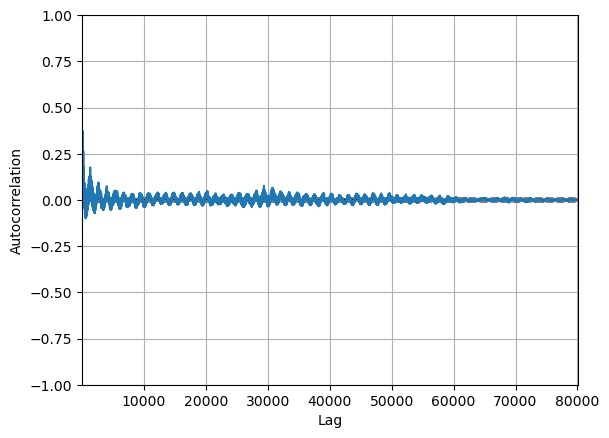

In [99]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

<Axes: xlabel='Date'>

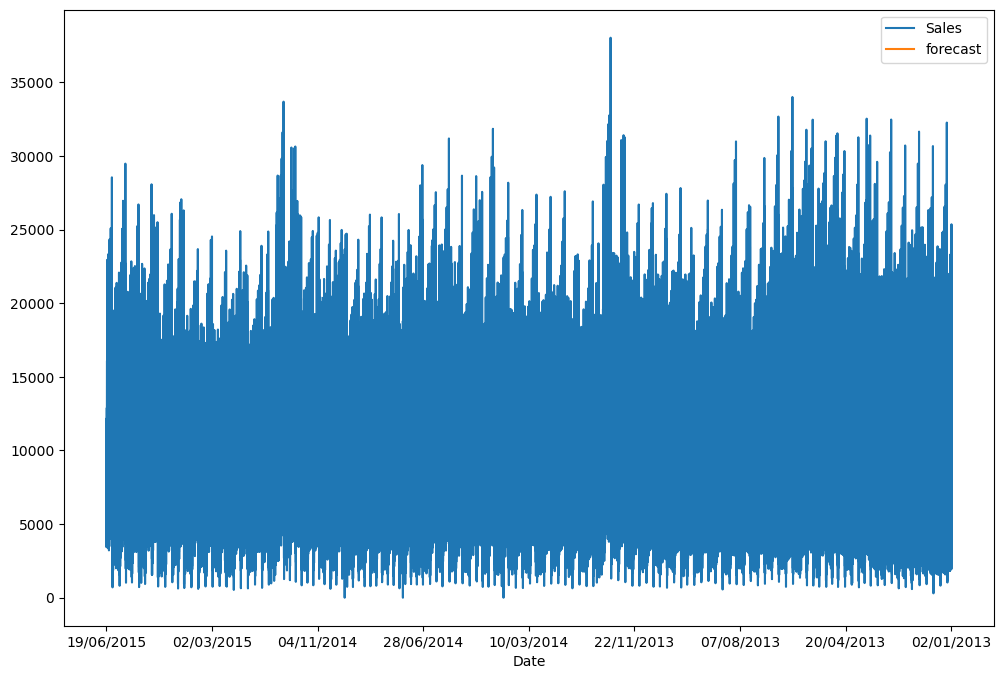

In [101]:
x['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
x[['Sales','forecast']].plot(figsize=(12,8))



<Axes: xlabel='Date'>

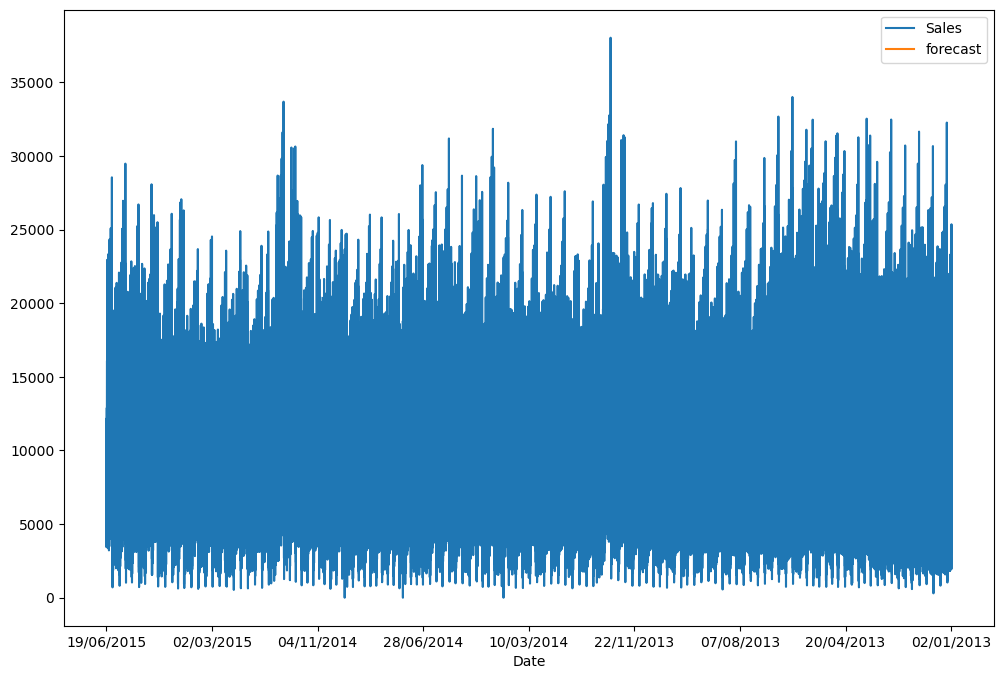

In [102]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
x['forecast']=results.predict(start=90,end=103,dynamic=True)
x[['Sales','forecast']].plot(figsize=(12,8))

In [105]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))



TypeError: unsupported operand type(s) for +: 'int' and 'DateOffset'